In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning')

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
import FunctionCollection as fc
import importlib
import quadpy
from scipy.special import erf
from scipy.integrate import quad_vec
import sympy
fc = importlib.reload(fc)
import torch

In [36]:
def bothVMF_NLLH(pred, kappa, label, weight):
    from torch import mean, cos, sin, abs, multiply, log, exp, square, sub

    azp = pred[:,0] #Azimuth prediction
    azt = label[:,0] #Azimuth target
    zep = pred[:,1] #Zenith prediction
    zet = label[:,1] #Zenith target

    s1 = sin( zet + azt - azp )
    s2 = sin( zet - azt + azp )
    c1 = cos( zet - zep )
    c2 = cos( zet + zep )
    cos_angle = 0.5*abs(sin(zep))*( s1 + s2 ) + 0.5*(c1 + c2)

    nlogC = - log(kappa[:,0]) + kappa[:,0] + log( 1 - exp( - 2 * kappa[:,0] ) )
    loss_3d = - kappa[:,0]*cos_angle + nlogC

    lnI0_az = kappa[:,1] + log(1 + exp(-2*kappa[:,1])) -0.25*log(1+0.25*square(kappa[:,1])) + log(1+0.24273*square(kappa[:,1])) - log(1+0.43023*square(kappa[:,1]))
    lnI0_ze = kappa[:,2] + log(1 + exp(-2*kappa[:,2])) -0.25*log(1+0.25*square(kappa[:,2])) + log(1+0.24273*square(kappa[:,2])) - log(1+0.43023*square(kappa[:,2]))
    loss_2d = - multiply(kappa[:,1],cos(sub(azt,azp))) - multiply(kappa[:,2],cos(sub(zet,abs(zep)))) + lnI0_az + lnI0_ze

    return loss_3d, loss_2d

In [27]:
x.flatten()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.6981, 0.6981, 0.6981, 0.6981, 0.6981, 0.6981, 0.6981, 0.6981,
        0.6981, 0.6981, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963,
        1.3963, 1.3963, 1.3963, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944,
        2.0944, 2.0944, 2.0944, 2.0944, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925,
        2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 3.4907, 3.4907, 3.4907, 3.4907,
        3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 4.1888, 4.1888, 4.1888,
        4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.8869, 4.8869,
        4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 5.5851,
        5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851,
        6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832,
        6.2832])

In [37]:
N = 10
x,y = torch.meshgrid(torch.linspace(0,2*np.pi,N),torch.linspace(0,np.pi,N))
pred = torch.cat([x.flatten().unsqueeze(-1),y.flatten().unsqueeze(-1)],dim=1)
label = torch.cat([torch.tensor([[np.pi,np.pi/2]]) for _ in range(pred.shape[0])],dim=0)
kappa = torch.cat([torch.tensor([[1.,1.,1.]]) for _ in range(pred.shape[0])],dim=0)

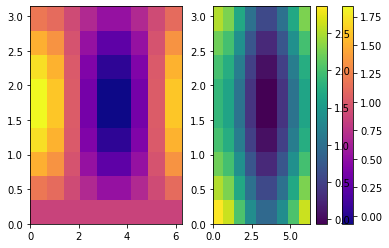

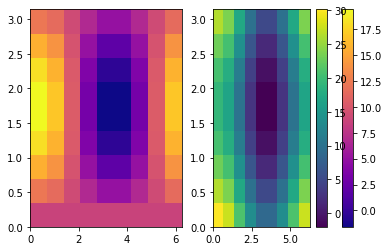

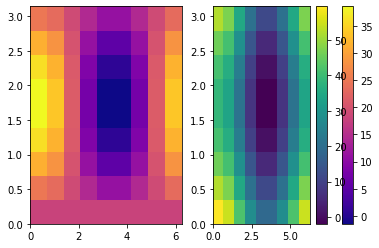

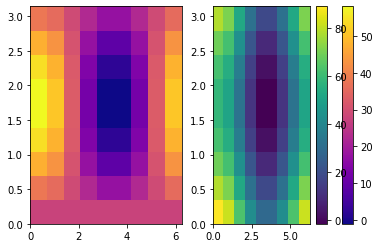

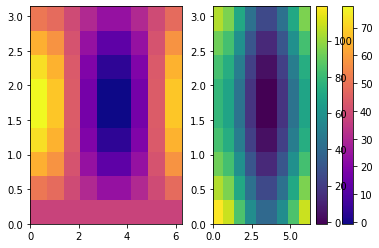

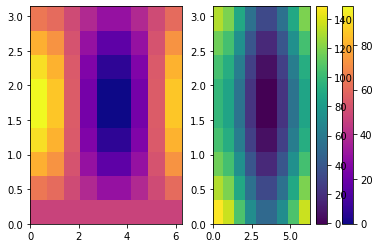

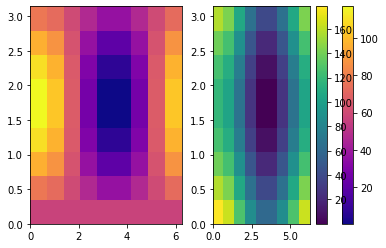

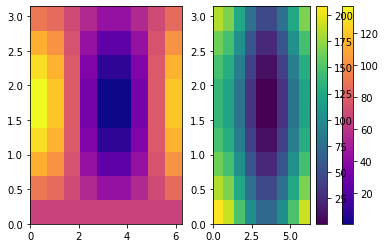

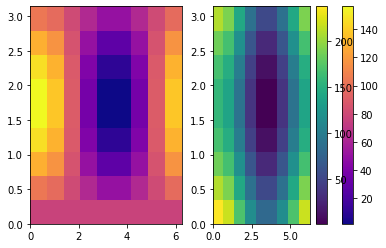

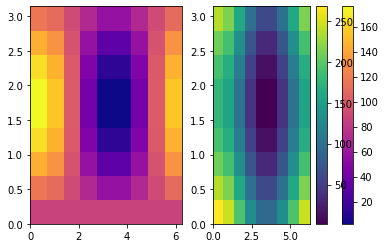

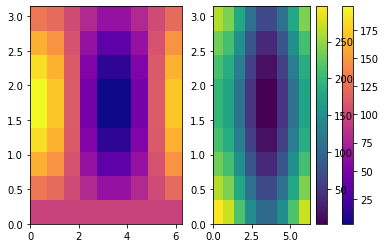

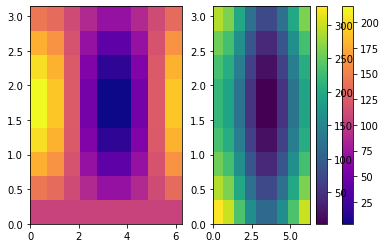

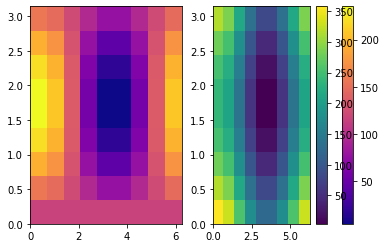

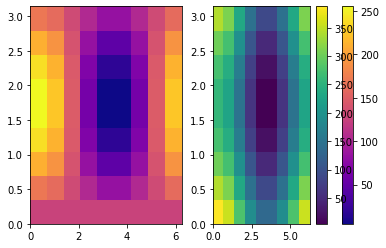

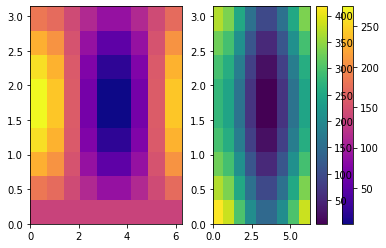

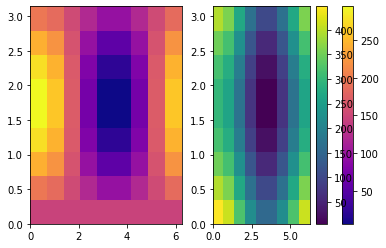

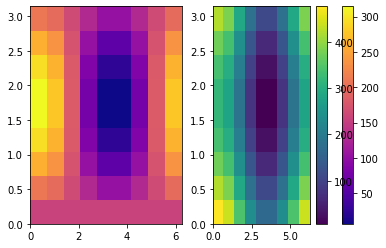

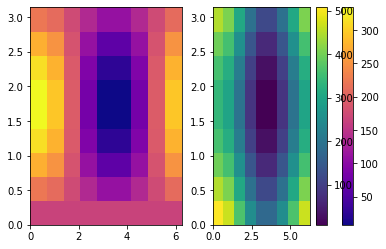

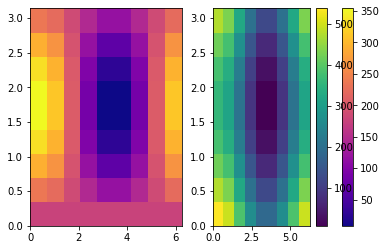

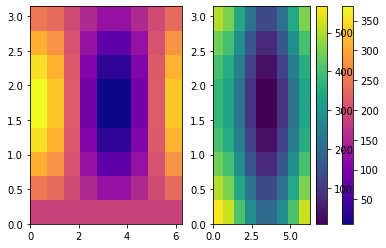

In [49]:
for kappa in range(1,200,10):
    kappa = torch.cat([torch.tensor([[kappa,kappa,kappa]],dtype=float) for _ in range(pred.shape[0])],dim=0)
    L3d, L2d = bothVMF_NLLH(pred,kappa,label,None)
    fig, ax = plt.subplots(ncols=2)
    im3d = ax[0].pcolormesh(x,y,L3d.view(N,N),cmap='plasma')
    im2d = ax[1].pcolormesh(x,y,L2d.view(N,N))
    plt.colorbar(im3d)
    plt.colorbar(im2d)